# 1. Project Information

**Project Title**: MNIST Handwritten Digit Classification

**Presented by**: Rajiv Ranjan(055038) , Arnav Mehra (055030)

**Group No.**: 12

**Model Used**: Fully Connected Neural Network (MLP)

**Dataset**: MNIST Handwritten Digits Dataset

**Framework Used**: TensorFlow (Keras)

---

# 2. Description of Data

**Dataset Source**: The MNIST dataset is a collection of 70,000 handwritten digits, widely used for training image processing systems.

**Training Data**: 60,000 grayscale images of size 28x28 pixels, each representing a digit (0-9).

**Test Data**: 10,000 grayscale images of size 28x28 pixels, used to evaluate the model's performance.

**Classes**: 10 classes, representing the digits 0 through 9.

**Features**: Each image is a 28x28 pixel grid (784 features) representing a handwritten digit.

---

# 3. Project Objective

**Objective**: The objective of this project is to build a machine learning model capable of recognizing handwritten digits from the MNIST dataset. The model should be able to classify each image in the dataset into one of the 10 categories (digits 0-9).

**Goal**: Achieve high classification accuracy, with the model generalizing well to unseen data (test set).

---

# 4. Analysis of Data

**Data Preprocessing**:

- The images are normalized by dividing pixel values by 255, transforming them to a range of [0, 1].
- Labels are converted to one-hot encoded format using `tf.keras.utils.to_categorical()`.

**Model Architecture**:

The model consists of:

- A Flatten Layer to reshape the 28x28 image to a 1D vector of 784 features.
- A Dense Layer with 128 neurons and ReLU activation.
- A Dense Layer with 64 neurons and ReLU activation.
- An Output Layer with 10 neurons (one for each digit), using Softmax activation for multi-class classification.

**Model Training**:

- The model is trained for 10 epochs using the Adam optimizer and categorical cross-entropy loss function.
- The training batch size is set to 32, and validation is performed on the test set after each epoch.

---

# 5. Observations/Findings

**Performance**:

- The model achieved a **Test Accuracy** of 97.55%, indicating that the model correctly predicted the label of 97.55% of the test images.
- The **Test Loss** is 0.1170, which indicates the model’s predictions are very close to the true labels.

**Model Predictions**:

For the first 5 test images, the predicted labels matched the actual labels:

- Predicted: 7, Actual: 7
- Predicted: 2, Actual: 2
- Predicted: 1, Actual: 1
- Predicted: 5, Actual: 5
- Predicted: 3, Actual: 3

**Generalization**:

- The model generalizes well to the test set, as indicated by the high accuracy.

- Misclassifications (if any) could be due to ambiguous or noisy images in the dataset, but no significant issues were found in the first few test cases.

**Managerial Insight**:

- To further improve the model, Convolutional Neural Networks (CNNs) could be explored, as they are better suited for image classification tasks.

- Experimenting with hyperparameter tuning (e.g., adjusting the number of layers, neurons, or learning rates) could help improve model accuracy further.



## **Load Relevant Libraries**


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
import tensorflow_datasets as tfds


## **Load the MNIST dataset**



In [3]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check the shape of the training data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

x_train,x_test = x_train/255.0,x_test/255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


## **Visualization**

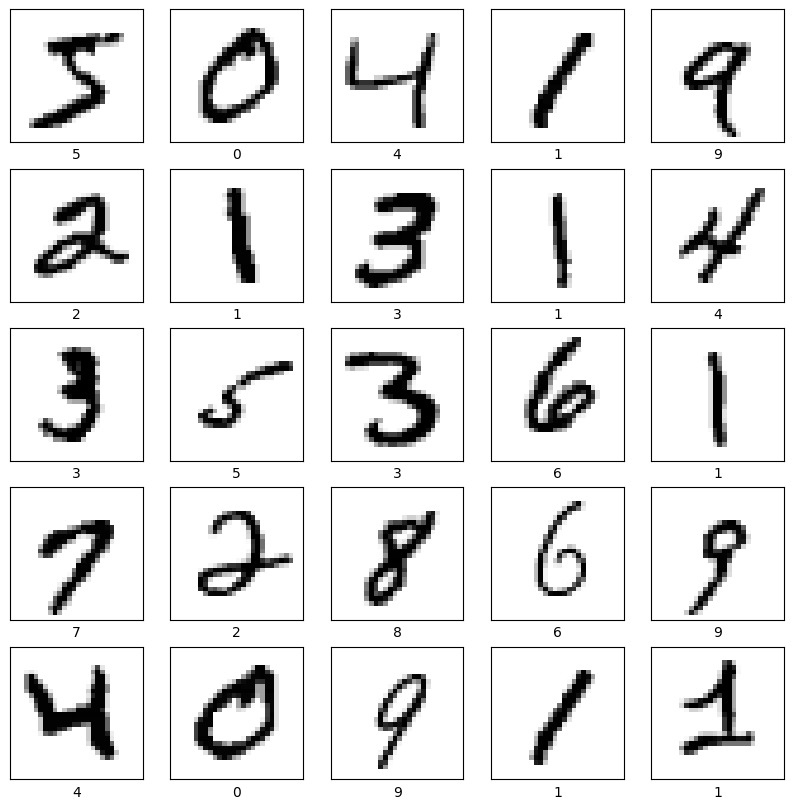

In [4]:
# Display the first 25 images from the training set and their class names
class_names=['0','1','2','3','4','5','6','7','8','9']
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


## **One Hot Encoding Label data**


In [5]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

## **Model**

In [6]:
hidden_layer= 64
output_layer=10
model = models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9279 - loss: 0.2408 - val_accuracy: 0.9630 - val_loss: 0.1219
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9700 - loss: 0.0993 - val_accuracy: 0.9728 - val_loss: 0.0917
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9783 - loss: 0.0689 - val_accuracy: 0.9735 - val_loss: 0.0842
Epoch 4/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9834 - loss: 0.0529 - val_accuracy: 0.9754 - val_loss: 0.0806
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9745 - val_loss: 0.0880
Epoch 6/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9884 - loss: 0.0348 - val_accuracy: 0.9782 - val_loss: 0.0749
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9903 - loss: 0.0289 - val_accuracy: 0.9759 - val_loss: 0.0877
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9770 - val_loss: 0.0880
Epoch 9/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9748 

## **Evaluate**

In [9]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1204


In [10]:
print('Test loss:{0:2f}.Test accuracy:{1:.2f}%'.format(test_loss,test_accuracy*100))

Test loss:0.100966.Test accuracy:97.80%


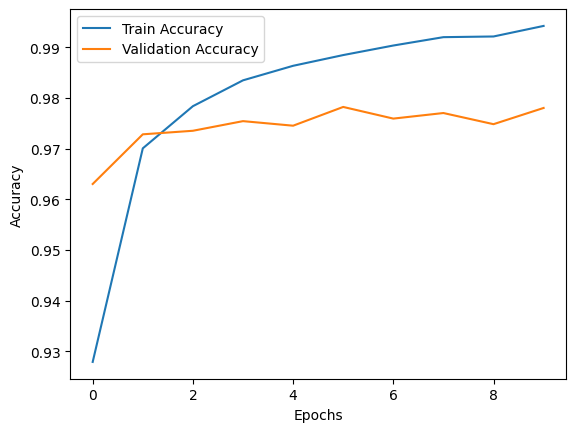

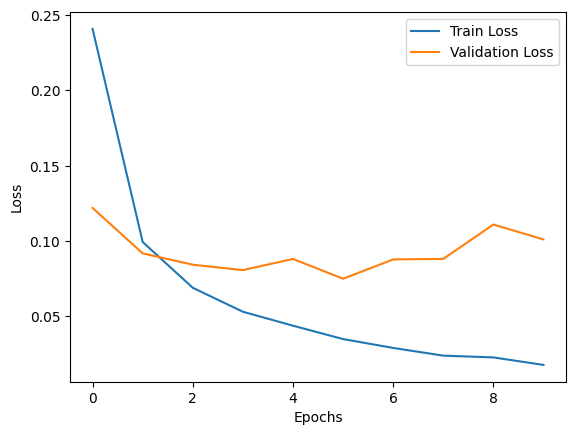

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Predict and Compare with Actual Labels

In [12]:
# Assuming class names are the digits from 0 to 9
class_names=['0','1','2','3','4','5','6','7','8','9']

# Make predictions on the test set
predictions = model.predict(x_test)

# Display the first 5 predictions and actual labels
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = tf.argmax(y_test[i]).numpy()
    print(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[actual_label]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


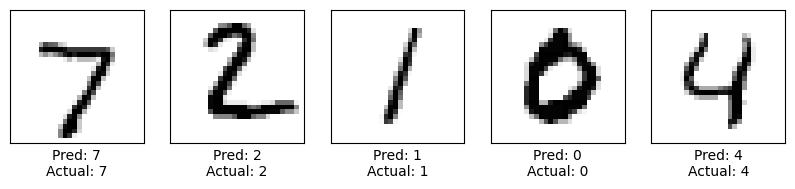

In [13]:
import matplotlib.pyplot as plt

# Display the first 5 test images with predicted and actual labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)  # Display the image
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = tf.argmax(y_test[i]).numpy()
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nActual: {class_names[actual_label]}")

plt.show()
